In [52]:
import gym
env = gym.make('CartPole-v0')
env.reset()
for _ in range(1000):
    env.render()
    env.step(env.action_space.sample()) # take a random action
env.close()

/Users/qiuying/anaconda3/envs/machine_learning/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [53]:
import numpy as np
import gym
from gym import wrappers
import matplotlib.pyplot as plt
import time

In [54]:
def run_episode(env, policy, gamma = 1.0, render = False):
    """ Evaluates policy by using it to run an episode and finding its
    total reward.

    args:
    env: gym environment.
    policy: the policy to be used.
    gamma: discount factor.
    render: boolean to turn rendering on/off.

    returns:
    total reward: real value of the total reward recieved by agent under policy.
    """
    total_reward_list = []
    obs = env.reset()
    total_reward = 0
    step_idx = 0
    while True:
        if render:
            env.render()
        obs, reward, done , _ = env.step(int(policy[obs]))
        total_reward += (gamma ** step_idx * reward)
        step_idx += 1
        if done:
            break
    return total_reward

In [55]:
def evaluate_policy(env, policy, gamma = 1.0,  n = 1000):
    """ Evaluates a policy by running it n times.
    returns:
    average total reward
    """
    scores = [
            run_episode(env, policy, gamma = gamma, render = False)
            for _ in range(n)]
    return np.mean(scores)


In [56]:
def extract_policy(v, gamma = 1.0):
    """ Extract the policy given a value-function """
    policy = np.zeros(env.nS)
    for s in range(env.nS):
        q_sa = np.zeros(env.action_space.n)
        for a in range(env.action_space.n):
            for next_sr in env.P[s][a]:
                # next_sr is a tuple of (probability, next state, reward, done)
                p, s_, r, _ = next_sr
                q_sa[a] += (p * (r + gamma * v[s_]))
        policy[s] = np.argmax(q_sa)
    return policy


In [57]:
def value_iteration(env, gamma = 1.0, max_iterations = 10000 ):
    """ Value-iteration algorithm """
    v = np.zeros(env.nS)  # initialize value-function
   
    eps = 1e-20
    for i in range(max_iterations):
        prev_v = np.copy(v)
        for s in range(env.nS):
            q_sa = [sum([p*(r + prev_v[s_]) for p, s_, r, _ in env.P[s][a]]) for a in range(env.nA)] 
            v[s] = max(q_sa)
        if (np.sum(np.fabs(prev_v - v)) <= eps):
            print ('Value-iteration converged at iteration# %d.' %(i+1))
            break
    return v



In [45]:
env_name  = 'FrozenLake8x8-v0'
#env_name = 'FrozenLake-v0'
gamma = 1.0
env = gym.make(env_name)
max_iterations = 100000
render = False
optimal_v = value_iteration(env, gamma,max_iterations);
policy = extract_policy(optimal_v, gamma)
policy_score = evaluate_policy(env, policy, gamma, n=1000)
    

Value-iteration converged at iteration# 2357.


In [46]:

if __name__ == '__main__':
    env_name  = 'FrozenLake8x8-v0'
    gamma = 1.0
    env = gym.make(env_name)
    max_iterations = 100000
    optimal_v = value_iteration(env, gamma,max_iterations);
    policy = extract_policy(optimal_v, gamma)
    policy_score = evaluate_policy(env, policy, gamma, n=1000)
    render = False
    print('Policy average score = ', policy_score)

Value-iteration converged at iteration# 2357.
Policy average score =  0.871


In [333]:
# for  i in range(100):
#     list = []

env_name  = 'FrozenLake8x8-v0'
gamma = 1.0
v = np.zeros(env.nS)  # initialize value-function
max_iterations = 100000
eps = 1e-20
for i in range(max_iterations):
    prev_v = np.copy(v)
    for s in range(env.nS):
        q_sa = [sum([p*(r + prev_v[s_]) for p, s_, r, _ in env.P[s][a]]) for a in range(env.nA)] 
        v[s] = max(q_sa)
        
    if (np.sum(np.fabs(prev_v - v)) <= eps):
        print ('Value-iteration converged at iteration# %d.' %(i+1))
        break
convergece = np.sum(np.fabs(prev_v - v))
print('convergece-score:', convergece)


    

Value-iteration converged at iteration# 2357.
convergece-score: 0.0


In [334]:
env_name  = 'FrozenLake8x8-v0'
gamma = 1.0
v = np.zeros(env.nS)  # initialize value-function
K = range(1,300)
convergece_list = []
iteration_list = []
for max_iterations in K:
    for i in range(max_iterations):
        prev_v = np.copy(v)
    for s in range(env.nS):
        q_sa = [sum([p*(r + prev_v[s_]) for p, s_, r, _ in env.P[s][a]]) for a in range(env.nA)] 
        v[s] = max(q_sa)
    if (np.sum(np.fabs(prev_v - v)) <= eps):
        print ('Value-iteration converged at iteration# %d.' %(i+1))
        break
    convergece = np.sum(np.fabs(prev_v - v))
    convergece_list.append(convergece)
    iteration_list.append(max_iterations)

        
        

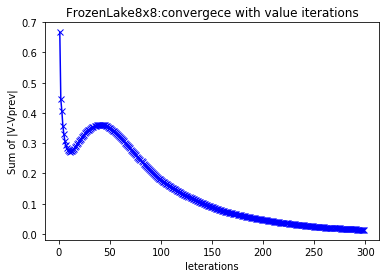

In [335]:
plt.plot(iteration_list, convergece_list, 'bx-')
plt.xlabel('Ieterations')
plt.ylabel('Sum of |V-Vprev|')
plt.title('FrozenLake8x8:convergece with value iterations')
plt.show()
### the goal of the value itteration is to calculate V(s), if the prev_V(s) - Current_V(s) is 0, then it converged
### if we define eps = 0, then Value-iteration converged at iteration# 2357.

In [339]:
env_name  = 'FrozenLake8x8-v0'
gamma = 1.0
v = np.zeros(env.nS)  # initialize value-function
K = range(1,300)
render = False
reward_list = []
time_list = []
for max_iterations in K:
    start_time = time.time()
    if __name__ == '__main__':
        env_name  = 'FrozenLake8x8-v0'
        gamma = 1.0
        env = gym.make(env_name)
        optimal_v = value_iteration(env, gamma,max_iterations);
        policy = extract_policy(optimal_v, gamma)
        policy_score = evaluate_policy(env, policy, gamma, n=1000)
        reward_list.append(policy_score)
        total_time = time.time() - start_time
        time_list.append(total_time)
    
        
    

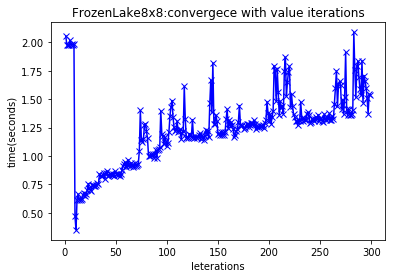

In [338]:
K = range(1,300)
plt.plot(K, time_list, 'bx-')
plt.xlabel('Ieterations')
plt.ylabel('time(seconds)')
plt.title('FrozenLake8x8:convergece with value iterations')
plt.show()

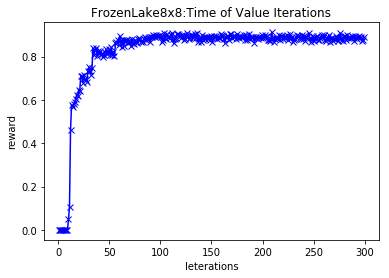

In [340]:
plt.plot(K, reward_list, 'bx-')
plt.xlabel('Ieterations')
plt.ylabel('Reward')
plt.title('FrozenLake8x8:Time of Value Iterations')
plt.show()

In [58]:
env_name2  = 'FrozenLake-v0'
env = gym.make(env_name2)
gamma = 1.0
eps = 1e-20
v = np.zeros(env.nS)  # initialize value-function
K = range(1,300)
convergece_list = []
iteration_list = []
for max_iterations in K:
    for i in range(max_iterations):
        prev_v = np.copy(v)
    for s in range(env.nS):
        q_sa = [sum([p*(r + prev_v[s_]) for p, s_, r, _ in env.P[s][a]]) for a in range(env.nA)] 
        v[s] = max(q_sa)
    if (np.sum(np.fabs(prev_v - v)) <= eps):
        print ('Value-iteration converged at iteration# %d.' %(i+1))
        break
    convergece = np.sum(np.fabs(prev_v - v))
    convergece_list.append(convergece)
    iteration_list.append(max_iterations)

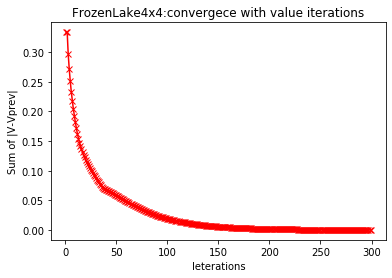

In [59]:
plt.plot(iteration_list, convergece_list, 'rx-')
plt.xlabel('Ieterations')
plt.ylabel('Sum of |V-Vprev|')
plt.title('FrozenLake4x4:convergece with value iterations')
plt.show()

In [70]:
K = range(1,300)
render = False
reward_list2 = []
time_list2 = []
for max_iterations in K:
    start_time = time.time()
    if __name__ == '__main__':
        env_name2  = 'FrozenLake-v0'
        env = gym.make(env_name2)
        gamma = 1.0
        optimal_v = value_iteration(env, gamma,max_iterations);
        policy = extract_policy(optimal_v, gamma)
        policy_score = evaluate_policy(env, policy, gamma, n=1000)
        reward_list2.append(policy_score)
        total_time = time.time() - start_time
        time_list2.append(total_time)
    

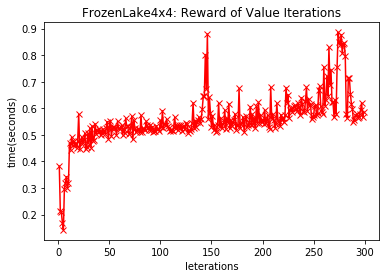

In [75]:
K = range(1,300)
plt.plot(K, time_list2, 'rx-')
plt.xlabel('Ieterations')
plt.ylabel('time(seconds)')
plt.title('FrozenLake4x4: Reward of Value Iterations')
plt.show()

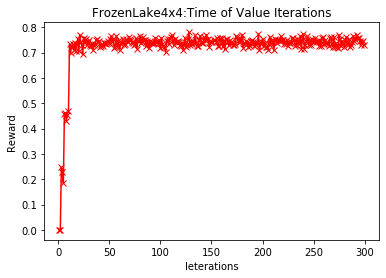

In [76]:
plt.plot(K, reward_list2, 'rx-')
plt.xlabel('Ieterations')
plt.ylabel('Reward')
plt.title('FrozenLake4x4:Time of Value Iterations')
plt.show()